In [11]:
from __future__ import division
import os
import re
import itertools
import community
from datetime import datetime, timedelta
from sklearn import preprocessing
import imblearn
from matplotlib.backends.backend_pdf import PdfPages

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
folder_directory =os.getcwd()
os.chdir(folder_directory)
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [12]:
df_results = pd.read_csv('NEWFb100Results.csv',sep=',')
df_results.head()

,mean_wt_LINK_RM,mean_wt_auc_x1_lbfgs,mean_wt_auc_x2_lbfgs,mean_wt_auc_x3_lbfgs,mean_wt_auc_xall_lbfgs,mean_wt_auc_xall_lbfgs_LF,mean_wt_node2vec,se_wt_LINK_RM,se_wt_auc_x1,se_wt_auc_x2,se_wt_auc_x3,se_wt_auc_xall,se_wt_auc_xall_LF,se_wt_node2vec
0,0.681381,0.501549,0.516754,0.521731,0.525821,0.547401,0.594875,0.029361,0.020080,0.017097,0.016775,0.019630,0.018402,0.022540
1,0.757090,0.508265,0.521738,0.528272,0.538864,0.561950,0.621241,0.018895,0.016554,0.017266,0.014655,0.016801,0.018498,0.025157
2,0.822131,0.515253,0.523645,0.532555,0.550665,0.569683,0.658455,0.013560,0.011250,0.011530,0.016978,0.019892,0.018248,0.017097
3,0.853968,0.518791,0.534878,0.538158,0.559747,0.575865,0.683383,0.009512,0.012288,0.012061,0.014384,0.017183,0.013437,0.017021
4,0.874519,0.518961,0.529906,0.545122,0.556006,0.577347,0.696025,0.007768,0.023028,0.013656,0.019341,0.018875,0.012257,0.015149


In [13]:
percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


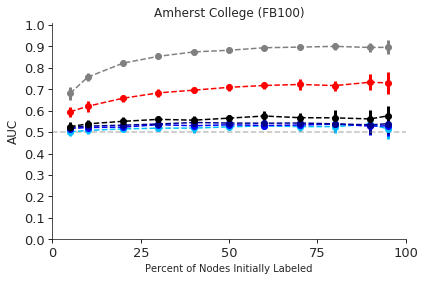

In [15]:
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x1_lbfgs,
            yerr=df_results.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')
        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x2_lbfgs,
            yerr=df_results.se_wt_auc_x2, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='blue')
        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x3_lbfgs,
            yerr=df_results.se_wt_auc_x3, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='darkblue')
        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_xall_lbfgs,
            yerr=df_results.se_wt_auc_xall, fmt='--o', capthick=2,
           alpha=1, elinewidth=3, color='black')
         
        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_LINK_RM,
            yerr=df_results.se_wt_LINK_RM, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='gray')
        
        grid[i].errorbar(percent_initially_labelled*100, df_results.mean_wt_node2vec,
            yerr=df_results.se_wt_node2vec, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='red')
         
            
            
            
        grid[i].set_ylim(0.3,1.1)
        grid[i].set_xlim(0,101)
        xadd = 0.02
        grid[i].set_ylim(0.25,1.01)
        grid[i].set_xlim(0,100)
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled')
        grid[i].set_ylabel('AUC',fontsize=12)
plt.title('Amherst College (FB100)',fontsize=12)
plt.tight_layout()
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0,0.1,0.2,0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1])
grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figs_final/NEWwithin_'+'Amherst'+'_FB100_auc_RF_costbased.pdf')

pp.savefig()
pp.close()